## INTRODUCTION

- The project guidelines mention that we are expected to create a model that classifies the trial data of a drug based on age, gender, and race. We were also entrusted with creating a dataset of 4,00,000 patients containing the following details for each patient based on various attributes according to the data: By the end of the project, we should be able to generate a dataset, produce insightful visualizations, clean the dataset, sanitize it, and preprocess the data to perform data partitioning and handle missing values. Create training and testing sets. Build a classifier and fit the data to the model.

### Importing Main Packages

In [1]:
## Importing the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset and Viewing it

In [2]:
## Lets Import the DataSet and Check It
data=pd.read_csv(r"C:\Users\lenovo\Desktop\DRUG SIDE EFFECTS.csv")
data.head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects


### Checking the Additional Information about the DataSet

In [3]:
## Basic information about the dataset
data.shape

(400000, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NAME          400000 non-null  object 
 1   GENDER        400000 non-null  object 
 2   DRUG NAME     400000 non-null  object 
 3   AGE           399980 non-null  float64
 4   RACE          400000 non-null  object 
 5   SIDE EFFECTS  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


In [5]:
##Checking the Description of the Data
data.describe()

,AGE
count,399980.000000
mean,41.466513
std,12.550773
min,14.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,600.000000


### Checking & Handling Null Values

In [6]:
## Checking null values
data.isna().sum()

NAME             0
GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64

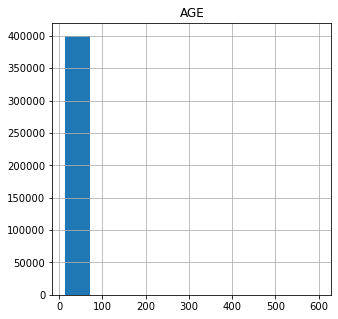

In [7]:
## Checking the skewness
freqgraph = data.select_dtypes(include=['float64'])     
freqgraph.hist(figsize=(5,5))
plt.show()

In [8]:
## Filling the null values with mean 
data['AGE']=data.AGE.fillna(data.AGE.mean())

In [9]:
## Again checking the null values after filling it
data.isna().sum()

NAME            0
GENDER          0
DRUG NAME       0
AGE             0
RACE            0
SIDE EFFECTS    0
dtype: int64

### Outlier Detection & Handling

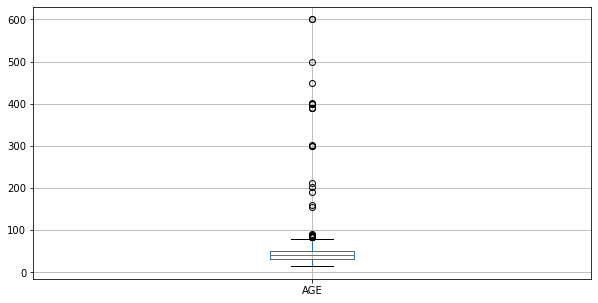

In [10]:
## Finding outliers
graph=data.select_dtypes(include=['float64'])
graph.boxplot(figsize=(10,5))
plt.show()

In [11]:
Q1 = np.percentile(data['AGE'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(data['AGE'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data['AGE'], 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 

In [12]:
print(low_lim)
print(up_lim)

1.0
81.0


In [13]:
outlier =[] 
for x in data['AGE']: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x)
print(outlier)

[300.0, 302.0, 87.0, 90.0, 84.0, 500.0, 400.0, 87.0, 203.0, 160.0, 400.0, 87.0, 87.0, 191.0, 450.0, 390.0, 84.0, 87.0, 84.0, 155.0, 300.0, 87.0, 87.0, 84.0, 390.0, 87.0, 84.0, 600.0, 84.0, 84.0, 87.0, 84.0, 211.0, 600.0, 401.0, 89.0, 300.0, 390.0]


In [14]:
ind1 = data['AGE']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [15]:
ind2 = data['AGE']>up_lim
data.loc[ind2].index

Int64Index([  3008,  41048,  43016,  52650,  60136,  66169,  85047,  93226,
            111850, 119574, 127240, 145846, 168426, 171643, 174039, 174487,
            186893, 209780, 218988, 224733, 232518, 242302, 245321, 259034,
            264849, 266215, 275520, 290165, 295943, 300452, 315506, 325628,
            325631, 333669, 337790, 363934, 384352, 393820],
           dtype='int64')

In [16]:
## Dropping the outliers
data.drop([3008,  41048,  43016,  52650,  60136,  66169,  85047,  93226,
            111850, 119574, 127240, 145846, 168426, 171643, 174039, 174487,
            186893, 209780, 218988, 224733, 232518, 242302, 245321, 259034,
            264849, 266215, 275520, 290165, 295943, 300452, 315506, 325628,
            325631, 333669, 337790, 363934, 384352, 393820 ], inplace=True)

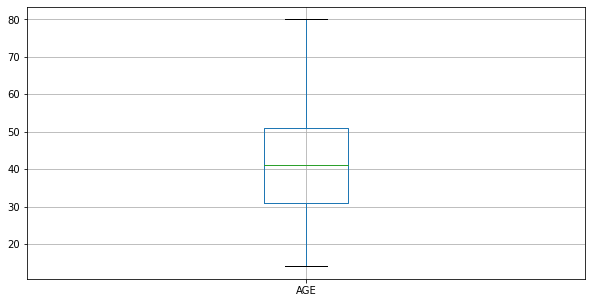

In [17]:
graph=data.select_dtypes(include=['float64'])
graph.boxplot(figsize=(10,5))
plt.show()

In [18]:
data["AGE"].describe()

count    399962.000000
mean         41.449759
std          12.333809
min          14.000000
25%          31.000000
50%          41.000000
75%          51.000000
max          80.000000
Name: AGE, dtype: float64

## Exploratory Data Analysis

In [19]:
data['DRUG NAME'].value_counts()

paxil         6268
lamictal      6045
nexium        6029
levoxyl       5958
lexapro       5691
              ... 
lantus           8
periostat        8
proair-hfa       8
bactrim-ds       8
arimidex         8
Name: DRUG NAME, Length: 502, dtype: int64

In [20]:
data['GENDER'].value_counts()

F    237730
M    162232
Name: GENDER, dtype: int64

(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'F')])

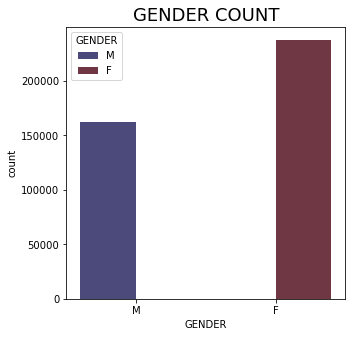

In [21]:
## Plotting a count plot on 'GENDER'
data['GENDER'].value_counts()
plt.figure(figsize=(5,5))
sns.countplot(x='GENDER',data=data,palette="icefire",hue='GENDER')
plt.title("GENDER COUNT",fontsize=18)
plt.xticks(rotation=0)

- The females have the greatest counts in the dataset, which are significantly higher than those of males

In [22]:
## Plotting a count plot on 'RACE'.
data['RACE'].value_counts()

White              314059
Hispanic, White     44053
Black               35842
Unknown              3046
Hispanic, Black      1673
Other                1009
Asian, Other          168
Asian Indian          104
Chinese                 8
Name: RACE, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic, White'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Black'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Hispanic, Black'),
  Text(6, 0, 'Asian, Other'),
  Text(7, 0, 'Asian Indian'),
  Text(8, 0, 'Chinese')])

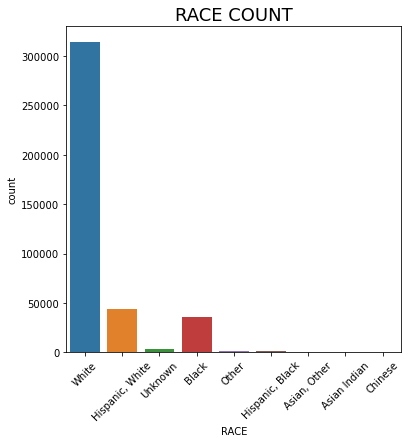

In [23]:
data["RACE"].value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='RACE',data=data)
plt.title("RACE COUNT",fontsize=18 )
plt.xticks(rotation=45)

- Chinese people, use the least amount of medications for treatment, whereas white people use the most.

In [24]:
data['DRUG NAME'].unique()

array(['topamax', 'zocor', 'tazorac', 'voltaren', 'tramadol', 'valtrex',
       'levoxyl', 'imitrex', 'seroquel', 'minocycline', 'proscar',
       'keflex', 'cataflam', 'zyrtec', 'lexapro', 'spironolactone',
       'claripel-cream', 'wellbutrin-sr', 'prozac', 'wellbutrin-xl',
       'citalopram', 'baclofen', 'concerta', 'singulair', 'angeliq',
       'yasmin', 'cialis', 'lunesta', 'cymbalta', 'methotrexate',
       'lamictal', 'evoclin', 'actonel', 'protonix', 'premarin',
       'provigil', 'protopic', 'prednisone', 'diazepam', 'ultram',
       'albuterol', 'zovirax', 'asacol', 'zegerid', 'halcion', 'differin',
       'nexium', 'phenergan', 'propecia', 'enalapril', 'chantix', 'avita',
       'synthroid', 'renova', 'buspar', 'retin-a-micro', 'climara',
       'estrace', 'klonopin', 'ambien', 'prevacid', 'lipitor',
       'wellbutrin', 'seasonique', 'paxil', 'nortriptyline', 'amoxil',
       'nitrofurantoin', 'tamiflu', 'noroxin', 'acyclovir', 'aromasin',
       'celebrex', 'claritin', '

In [25]:
data['SIDE EFFECTS'].unique()

array(['Mild Side Effects', 'Extremely Severe Side Effects',
       'Severe Side Effects', 'No Side Effects', 'Moderate Side Effects'],
      dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mild Side Effects'),
  Text(1, 0, 'Extremely Severe Side Effects'),
  Text(2, 0, 'Severe Side Effects'),
  Text(3, 0, 'No Side Effects'),
  Text(4, 0, 'Moderate Side Effects')])

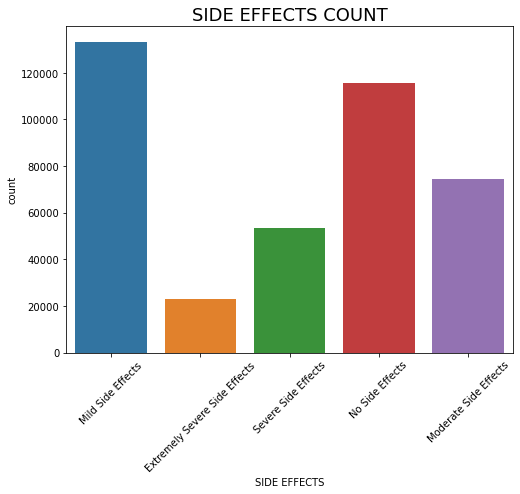

In [26]:
## Plotting a count plot on the 'SIDE EFFECTS'
data['SIDE EFFECTS'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(data=data,x='SIDE EFFECTS')
plt.title('SIDE EFFECTS COUNT',fontsize=18)
plt.xticks(rotation=45)

- The majority of the medications have Mild Side Effects.

In [27]:
## Dropping the  attribute ‘NAME’ as it doesn't give any contribution to the modeling.
data=data.drop(['NAME'],axis=1)
data.head()

,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,M,topamax,41.0,White,Mild Side Effects
1,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,F,tazorac,31.0,White,Mild Side Effects
3,F,voltaren,44.0,White,Severe Side Effects
4,M,tramadol,24.0,White,No Side Effects


### Encoding

In [28]:
## Label Encoding
df=data.copy()

In [29]:
## Importing the Library for Label Encoder
from sklearn.preprocessing import LabelEncoder

In [30]:
df.head()

,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,M,topamax,41.0,White,Mild Side Effects
1,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,F,tazorac,31.0,White,Mild Side Effects
3,F,voltaren,44.0,White,Severe Side Effects
4,M,tramadol,24.0,White,No Side Effects


In [31]:
attr = []
for i in df.columns:
    if df[i].dtype == 'object':
        attr.append(i)
labelencoder = LabelEncoder()
mapping =[]
for i in attr:
    df[i] = labelencoder.fit_transform(df[i])
    lemap = dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
    mapping.append(lemap)
print(f"{mapping}")

[{'F': 0, 'M': 1}, {'abilify': 0, 'accolate': 1, 'accupril': 2, 'accutane': 3, 'aciphex': 4, 'actiq': 5, 'actonel': 6, 'actos': 7, 'acyclovir': 8, 'aczone': 9, 'adcirca': 10, 'adderall': 11, 'adderall-xr': 12, 'adipex-p': 13, 'advair-diskus': 14, 'advair-hfa': 15, 'albuterol': 16, 'aldactone': 17, 'aldara': 18, 'alendronate': 19, 'alesse': 20, 'allegra': 21, 'allegra-d': 22, 'aloprim': 23, 'alprazolam': 24, 'ambien': 25, 'ambien-cr': 26, 'amerge': 27, 'amitiza': 28, 'amoxil': 29, 'amphetamine': 30, 'ampicillin': 31, 'anafranil': 32, 'androgel': 33, 'angeliq': 34, 'antivert': 35, 'aralen': 36, 'arava': 37, 'aricept': 38, 'arimidex': 39, 'armour-thyroid': 40, 'aromasin': 41, 'arthrotec': 42, 'asacol': 43, 'asmanex': 44, 'atacand': 45, 'atarax': 46, 'atenolol': 47, 'ativan': 48, 'atripla': 49, 'augmentin': 50, 'avage': 51, 'avapro': 52, 'avelox': 53, 'avita': 54, 'avodart': 55, 'axert': 56, 'aygestin': 57, 'azasan': 58, 'azelex': 59, 'azopt': 60, 'azor': 61, 'baciim': 62, 'baclofen': 63, 

<AxesSubplot:>

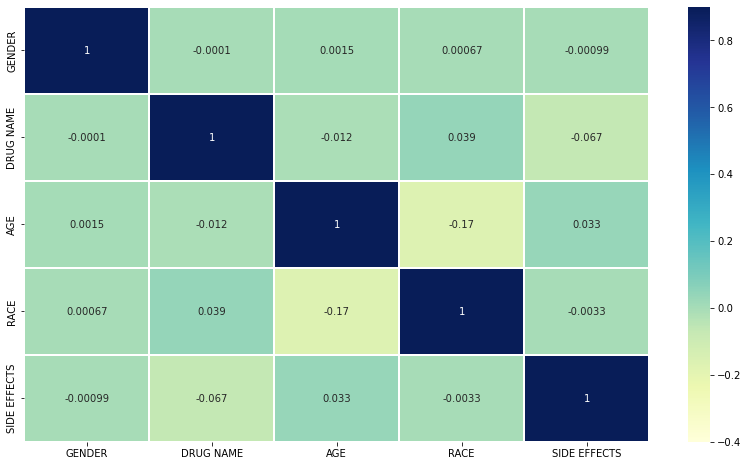

In [32]:
## Plotting a correlation heatmap 
corrmatrix = df.corr()
plt.subplots(figsize=(14,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

In [33]:
## Dropping the attribute 'RACE' due to its high negative correlation
df.drop(['RACE'], axis=1, inplace=True)
df.head(3)

,GENDER,DRUG NAME,AGE,SIDE EFFECTS
0,1,435,41.0,1
1,1,491,53.0,0
2,0,425,31.0,1


<AxesSubplot:>

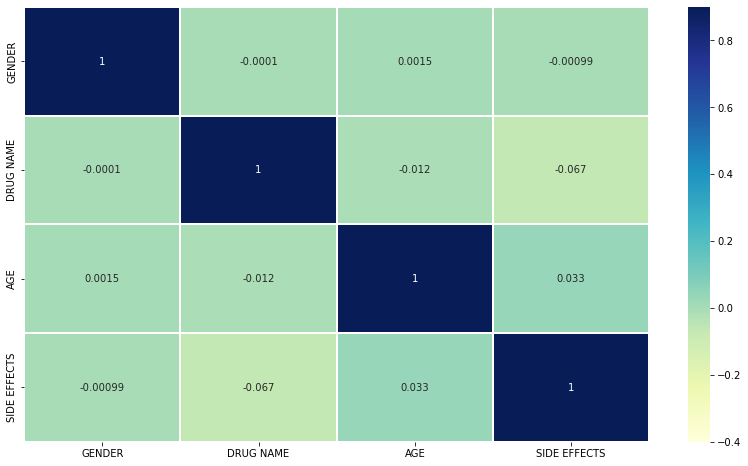

In [34]:
corrmatrix = df.corr()
plt.subplots(figsize=(14,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

### Importing Important Libraries of Model Building

In [35]:
## Importing the necessary Libraries for model building
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

### Splitting the Data inti X & Y

In [36]:
X = df.drop(['SIDE EFFECTS'], axis=1)
y = df['SIDE EFFECTS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=42)

## Model Building

### Logistic Regression Classifier

In [37]:
## Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.3285519369655754
precision score: 0.12203315548173203
recall_score: 0.1994733794894431
f1 score: 0.1192087316665766


### K-Nearest Neighbour Classifier

In [38]:
## K-Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9712401865887547
precision score: 0.9660990244404412
recall_score: 0.9717278141003461
f1 score: 0.9687912551701947


### Random Forest Classifier

In [39]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RFC
rft=RFC(n_estimators=100, random_state=42)
rft.fit(X_train,y_train)
y_Pred=rft.predict(X_test)
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9712401865887547
precision score: 0.9660990244404412
recall_score: 0.9717278141003461
f1 score: 0.9687912551701947


### Dicission Tree Classifier

In [40]:
## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.9771693085786537
precision score: 0.9801719117386677
recall_score: 0.9697295226345648
f1 score: 0.9747986313973962


### Naive Bayes Classifier

In [41]:
## Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("accuracy is:",accuracy_score(y_test,y_pred))
print("precision score:",precision_score(y_test,y_pred,average='macro'))
print("recall_score:",recall_score(y_test,y_pred,average='macro'))
print('f1 score:',f1_score(y_test,y_pred,average='macro'))

accuracy is: 0.332280854650789
precision score: 0.06645617093015779
recall_score: 0.2
f1 score: 0.0997630052224641


#### The main objective of the project is to build a classification model that classifies the side effects of a particular drug.

- After the implementation of the Logistic Regression, K-Nearest Neighbour (KNN), Random Forest, Decision Tree, and  Gaussian Naive Bayes algorithms, the Decision Tree classifier came out with the best accuracy of prediction ( Accuracy is 0.97716).

### Thanking You

#### Shreyash Sable

                                 - - - - - - - - X X X X X X X X - - - - - - - - 